## Notebook to run the analysis for 

In [1]:
from expansion_tools.blob_expansion_tools_jetset import *
from expansion_tools.delay_analysis import gamma_radio_delay_fit,gamma_radio_delay_analysis_vs_v_exp,gamma_radio_delay_analysis_vs_freq
from astropy.table import Table
from astropy.units import Unit as u
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val
delta=temp_ev_acc_flare.rad_region.jet.parameters.beam_obj.val
z=temp_ev_acc_flare.rad_region.jet.parameters.z_cosm.val
flare_duration_obs_d=temp_ev_acc_flare.parameters.duration.val/86400/delta*(1+z)

temp_ev_exp=JetTimeEvol.load_model('temp_ev_sim_exp_beta_0.1_no_sync_cooling/temp_ev_expansion_beta_exp=0.100.pkl')
t_exp=temp_ev_exp.parameters.t_jet_exp.val

t_exp_obs_d=t_exp/86400/delta
print(t_exp_obs_d,R0)




0.0 5000000000000000.0


In [2]:
from expansion_tools.delay_analysis import gamma_radio_delay_fit,gamma_radio_delay_analysis_vs_v_exp,gamma_radio_delay_analysis_vs_freq
from astropy.table import Table

In [3]:
t=Table.read('temp_ev_analysis_nu_trends_no_synch_cooling/gamma_radio_delay_fit_vs_freq.ecsv')
nu_max=45E9
nu_min=10E9
t=t[t['nu_obs']<=nu_max]
t=t[t['nu_obs']>nu_min]

------ ExpTrise


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
ExpTrise,R0,2.944402e+14,2.944402e+14,1.506666e+15,--,1.666667e+14,1.666667e+13,1.666667e+15,False
ExpTrise,beta_exp,4.649097e-04,4.649097e-04,3.567384e-02,--,1.000000e-01,1.000000e-05,3.000000e-01,False
ExpTrise,nu_0,7.758964e+10,7.758964e+10,1.654180e+10,--,9.000000e+10,5.000000e+10,5.000000e+11,False
ExpTrise,phi,3.843167e-03,3.843167e-03,1.133068e-01,--,5.000000e-01,0.000000e+00,1.000000e+00,False


R_0  5.000000e+15
R0 fit 2.944402e+14
R0 fit *delta 8.833205e+15
p fit= 0.01+/-0.28
------ Decay


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
ExpTdec,R0,1.686994e+14,1.686994e+14,2.619869e+13,--,1.666667e+14,1.666667e+13,1.666667e+15,False
ExpTdec,beta_exp,9.015568e-02,9.015568e-02,1.394113e-02,--,1.000000e-01,1.000000e-05,3.000000e-01,False
ExpTdec,nu_0,9.582913e+10,9.582913e+10,2.264478e+10,--,9.000000e+10,5.000000e+10,5.000000e+11,False
ExpTdec,phi,6.548077e-01,6.548077e-01,4.763271e-02,--,5.000000e-01,0.000000e+00,1.000000e+00,False
ExpTdec,m_B,9.676066e-01,9.676066e-01,1.491065e-01,--,1.000000e+00,5.000000e-01,2.500000e+00,False


p fit  1.957459e+00
R_0  5.000000e+15
R_0 fit 1.686994e+14
R_0_fit*delta 5.060981e+15
p fit= 1.93+/-0.20
------ ExpDeltaT_vexp


model name,name,val,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
DeltaT,R0,2.764603e+14,2.764603e+14,4.037314e+13,--,1.666667e+14,1.666667e+13,1.666667e+15,False
DeltaT,t_exp,0.000000e+00,0.000000e+00,1.000000e-01,--,0.000000e+00,0.000000e+00,0.000000e+00,False
DeltaT,beta_exp,3.367197e-03,3.367197e-03,4.921225e-04,--,1.000000e-01,1.000000e-05,3.000000e-01,False
DeltaT,nu_0,7.144925e+10,7.144925e+10,3.488265e+09,--,9.000000e+10,5.000000e+10,5.000000e+11,False
DeltaT,phi,2.875725e-02,2.875725e-02,4.115846e-03,--,5.000000e-01,0.000000e+00,1.000000e+00,False


R_0  5.000000e+15
R_0_fit 2.764603e+14
R_0_fit*delta 8.293809e+15
p fit= 0.072+/-0.010
t_exp 0.000000e+00
t_exp d 0.000000e+00
t_exp_sym 0.000000e+00
------


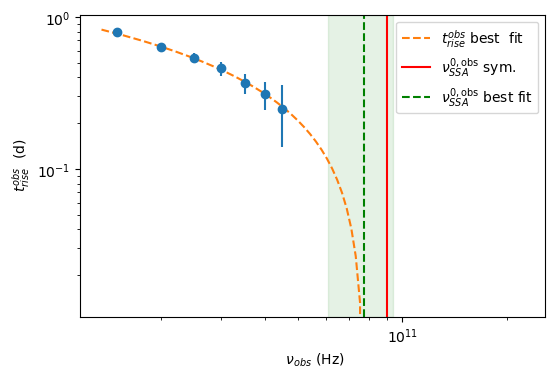

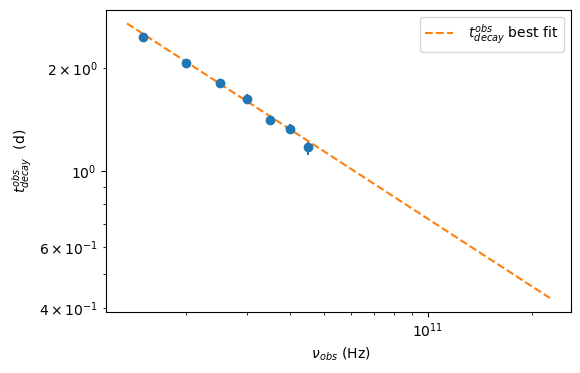

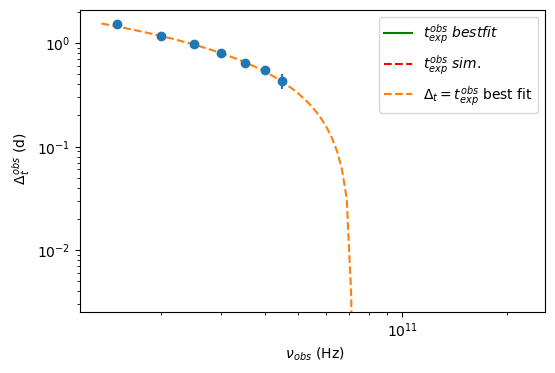

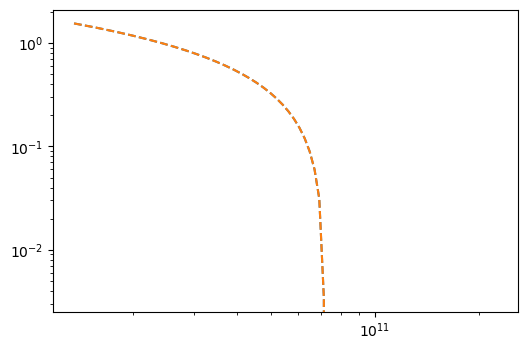

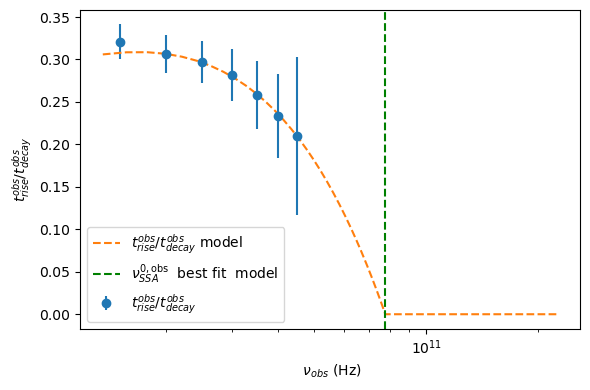

In [4]:
f_tdec,f_trise,f_delta_t,f_sp=gamma_radio_delay_analysis_vs_freq(t['nu_obs'], t['t_decay_conv'],t['t_decay_conv_err'],t['t_rise_conv'],t['t_rise_conv_err'] ,t['delta_T_conv'],t['delta_T_conv_err'],0,R0,t_exp,delta,t['beta_exp'][0],nu_0_actual=90E9)


In [5]:
#f_tdec.tight_layout()
f_tdec.savefig('temp_ev_analysis_nu_trends_no_synch_cooling/t_dec_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)

#f_trise.tight_layout()
f_trise.savefig('temp_ev_analysis_nu_trends_no_synch_cooling/t_rise_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)

#f_delta_t.tight_layout()
f_delta_t.savefig('temp_ev_analysis_nu_trends_no_synch_cooling/delta_t_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)

#f_sp.tight_layout()
f_sp.savefig('temp_ev_analysis_nu_trends_no_synch_cooling/sp_nu.pdf',bbox_inches = 'tight',
    pad_inches = 0)